In [1]:
import numpy as np
import matplotlib.pyplot as plt
from boututils.datafile import DataFile
DataFile('./BOUT.dmp.0.nc').list()

['BOUT_VERSION',
 'Bxy',
 'G1',
 'G2',
 'G3',
 'J',
 'K',
 'MXG',
 'MXSUB',
 'MYG',
 'MYPE',
 'MYSUB',
 'MZ',
 'MZG',
 'MZSUB',
 'NXPE',
 'NYPE',
 'NZPE',
 'PE_XIND',
 'PE_YIND',
 'T',
 'ZMAX',
 'ZMIN',
 'chi_T',
 'dx',
 'dy',
 'dz',
 'g11',
 'g12',
 'g13',
 'g22',
 'g23',
 'g33',
 'g_11',
 'g_12',
 'g_13',
 'g_22',
 'g_23',
 'g_33',
 'has_caliper',
 'has_cuda',
 'has_fftw',
 'has_gettext',
 'has_hypre',
 'has_lapack',
 'has_netcdf',
 'has_petsc',
 'has_pretty_function',
 'has_pvode',
 'has_raja',
 'has_scorep',
 'has_slepc',
 'has_sundials',
 'has_umpire',
 'hist_hi',
 'iteration',
 'ixseps1',
 'ixseps2',
 'jyseps1_1',
 'jyseps1_2',
 'jyseps2_1',
 'jyseps2_2',
 'nx',
 'ny',
 'ny_inner',
 'nz',
 'run_id',
 'run_restart_from',
 't_array',
 'tt',
 'use_backtrace',
 'use_check_level',
 'use_color',
 'use_metric_3d',
 'use_msgstack',
 'use_openmp',
 'use_openmp_schedule',
 'use_output_debug',
 'use_sigfpe',
 'use_signal',
 'use_track',
 'zperiod',
 'ncalls',
 'ncalls_e',
 'ncalls_i',
 'wal

In [2]:
from boutdata.collect import collect
T = collect('T')
K = collect('K')
t = collect('t')
chi_T = collect('chi_T')
nx = collect('nx')
T.shape

mxsub = 64 mysub = 1 mz = 1

nxpe = 4, nype = 1, npes = 4

Reading from 0: [0-65][0-0] -> [0-65][0-0]

Reading from 1: [2-65][0-0] -> [66-129][0-0]

Reading from 2: [2-65][0-0] -> [130-193][0-0]

Reading from 3: [2-67][0-0] -> [194-259][0-0]


mxsub = 64 mysub = 1 mz = 1

nxpe = 4, nype = 1, npes = 4

Reading from 0: [0-65][0-0] -> [0-65][0-0]

Reading from 1: [2-65][0-0] -> [66-129][0-0]

Reading from 2: [2-65][0-0] -> [130-193][0-0]

Reading from 3: [2-67][0-0] -> [194-259][0-0]


mxsub = 64 mysub = 1 mz = 1

nxpe = 4, nype = 1, npes = 4

mxsub = 64 mysub = 1 mz = 1

nxpe = 4, nype = 1, npes = 4

Reading from 0: [0-65][0-0] -> [0-65][0-0]

Reading from 1: [2-65][0-0] -> [66-129][0-0]

Reading from 2: [2-65][0-0] -> [130-193][0-0]

Reading from 3: [2-67][0-0] -> [194-259][0-0]




(8001, 260, 1, 1)

In [42]:
chimean = []
K_max = []
chi_not = []
for i in range(len(chi_T[:,0,0,0])):
    chimean.append(np.mean(chi_T[i,:,0,0]))
    K_max.append(np.max(K[i,:,0,0]))
    chi_not.append(1e-5)
print(np.shape(chimean))

(8001,)


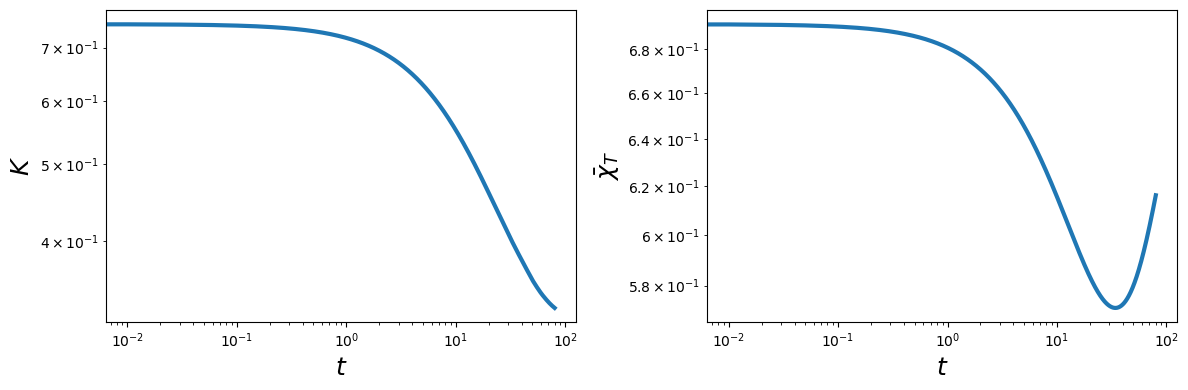

In [47]:
fig, ax = plt.subplots(ncols=2,figsize=(12,4))
ax[0].plot(t,K_max,linewidth=3)
ax[0].set_xlabel(r'$t$',fontsize=18); ax[0].set_ylabel(r'$K$',fontsize=18)
ax[0].set_yscale('log'); ax[0].set_xscale('log')

ax[1].plot(t,chimean,linewidth=3)
# ax[1].plot(t,chi_not,linewidth=3,linestyle='--',label=r'$\chi_0$')
ax[1].set_xlabel(r'$t$',fontsize=18); ax[1].set_ylabel(r'$\bar{\chi}_T$',fontsize=18)
ax[1].set_yscale('log'); ax[1].set_xscale('log')
# ax[1].legend(loc='best',shadow=True)

plt.tight_layout()
plt.show()

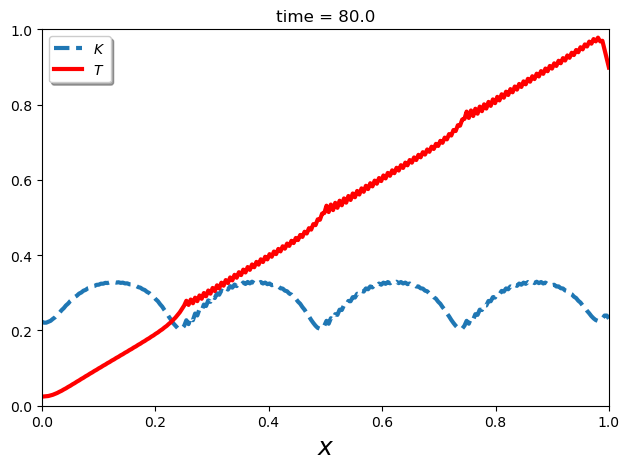

In [40]:
import numpy as np
import matplotlib.pyplot as plt
nt = -1
x = np.linspace(0,1,nx)
fig, ax = plt.subplots()
ax.plot(x,K[nt,:,0,0],linestyle='--',linewidth=3,label=r'$K$')
ax.plot(x,T[nt,:,0,0],color='red',linewidth=3,label=r'$T$')
# ax.plot(x,chi_T[nt,:,0,0],linewidth=3,label=r'$\chi_T$')
ax.set_title('time = '+str(round(t[nt],2)),fontsize=12)
ax.set_xlabel(r'$x$',fontsize=18)
ax.set_xlim(0,1); ax.set_ylim(0,1)
ax.legend(loc='best',shadow=True)
plt.tight_layout()
plt.show()

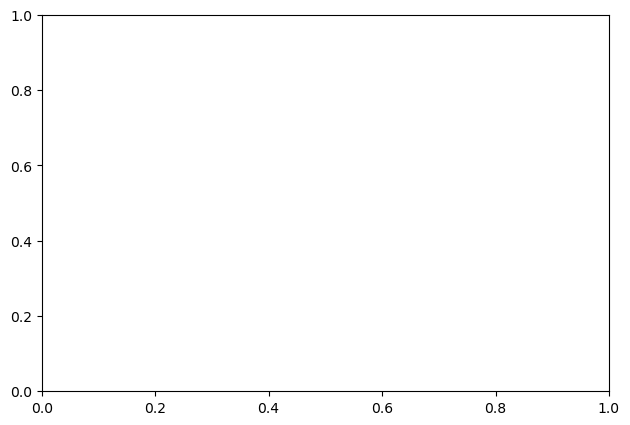

In [61]:
import os
isav = 25
output_dir = "plot_img"
fig, ax = plt.subplots()
x = np.linspace(0,1,nx)
for it in range(len(K[:,0,0,0])):
    if it%isav==0:
        ax.plot(x,K[it,:,0,0],linestyle='--',linewidth=3,label=r'$K$')
        ax.plot(x,T[it,:,0,0],color='red',linewidth=3,label=r'$T$')
        ax.set_title('time = '+str(round(t[it],2)),fontsize=12)
        ax.set_xlabel(r'$x$',fontsize=18)
        ax.set_xlim(0,1); ax.set_ylim(0,1)
        ax.legend(loc='best',shadow=True)
        plt.tight_layout()
        
        filename = f"Kinetic_Temperature_{it//isav:03d}.png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath)
        plt.cla()

In [55]:
isav = 25
list_length = []
for it in range(8000):
    if it%isav==0:
        list_length.append(it)
    else:
        pass
print(len(list_length))
print(len(list_length)/30)

320
10.666666666666666


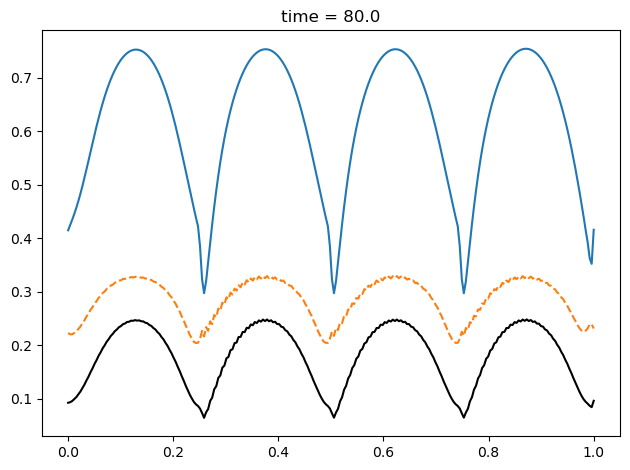

In [62]:
import numpy as np
import matplotlib.pyplot as plt
nt = -1
x = np.linspace(0,1,nx)
fig, ax = plt.subplots()
ax.plot(x,chi_T[nt,:,0,0])
ax.plot(x,K[nt,:,0,0],linestyle='--')
ax.plot(x,chi_T[nt,:,0,0]*K[nt,:,0,0],c='k')
ax.set_title('time = '+str(round(t[nt],2)),fontsize=12)
plt.tight_layout()
plt.show()

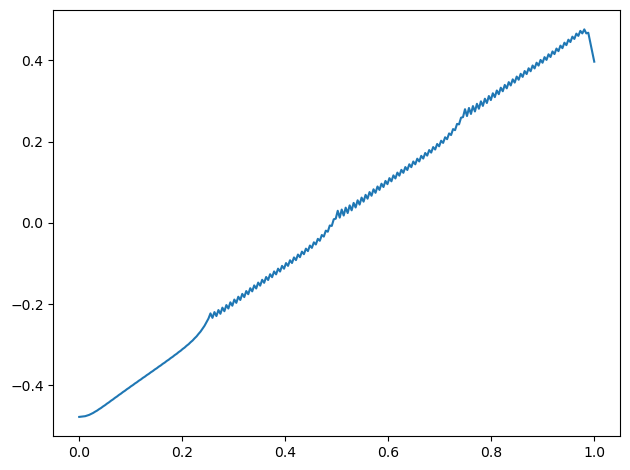

In [63]:
T_tilde = np.zeros((len(T[:,0,0,0]), len(T[0,:,0,0])))
for i in range(len(T[:,0,0,0])):
    T_tilde[i,:] = T[i,:,0,0]-np.mean(T[i,:,0,0])
nt = -1
x = np.linspace(0,1,nx)
fig, ax = plt.subplots()
ax.plot(x,T_tilde[nt,:])
plt.tight_layout()
plt.show()